# Analysis: Why Manchester City 2017/18 is the most dominant Premier League champion

#### This project aims to explore the viewpoint that Manchester City's 2017/2018 title-winning team are the most dominant Premier League champion of all time. The reason this viewpoint exists is mainly due to them holding the record for the most points scored in a league campaign, along with only 2 losses the entire season. To make the case for this, I will be using different stats from 2 datasets I have collected, ranging from season stats, per 90 stats, and even for the more recent teams, expected and possession stats.

# Imports & Tools

In [338]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates

# Dataset Loading & Cleaning

In [340]:
# Define column names
column_names = ["Team", "Poss%", "Touches", "Def Box", "Def 3rd", "Mid 3rd", "Att 3rd", "Att Box", "Live Att", "Succ", "Succ%", "Tkld", "Tkld%", "Carries","TotDist", "PrgDist", "PrgC", "1_3", "CPA", "Mis", "Dis", "Rec", "PrgR", "Extra"]

possession_df.columns = column_names

# Define CSV files (replace with your file paths before running)
standard_df = pd.read_csv('/Users/taki-eddine/Desktop/Man City Data Project/All-Standard-Stats.csv', header=1)
possession_df = pd.read_csv('/Users/taki-eddine/Desktop/Man City Data Project/All-Possession-Stats.csv', header=1)

# Remove any rows that are still headers duplicated in data
standard_df = standard_df[standard_df["Team"] != "Team"]
possession_df = possession_df[possession_df["Team"] != "Team"]

standard_df = standard_df.dropna(subset=["Team"], how="all")
possession_df = possession_df.dropna(subset=["Team"], how="all")

# Standard Stats Table

In [342]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
display(standard_df)

,Team,Players,AvgAge,Poss,MP,Wins,Points,PPG,GF,GA,GD,Assists,G+A,GF-PK,PK,PKatt,CS,CrdY,CrdR,xG,npxG,xAG,npxG+xAG,PrgC,PrgP,Gls,Ast,G+A.1,G-PK,G+A-PK,xG.1,xAG.1,xG+xAG,npxG.1,npxG+xAG.1
0,Manchester City 22/23,24,27.2,64.7,38,28,89,2.3,94,33,61,69,163,85,9,10,13,44,1.0,78.6,71.1,57.5,128.6,988.0,2073.0,2.42,1.82,4.24,2.18,4.00,2.07,1.51,3.58,1.87,3.38
1,Liverpool 19/20,24,26.6,62.9,38,32,99,2.6,85,33,52,69,154,80,5,5,15,38,1.0,68.9,65.0,53.0,118.0,967.0,1941.0,2.18,1.82,4.00,2.05,3.87,1.81,1.39,3.21,1.71,3.10
2,Manchester City 17/18,25,26.4,71.0,38,32,100,2.6,106,27,79,85,191,100,6,8,18,63,NaN,78.6,72.7,57.9,130.6,1308.0,2570.0,2.71,2.24,4.95,2.55,4.79,2.07,1.52,3.59,1.91,3.44
3,Manchester Utd 07/08,25,26.7,NaN,38,27,87,2.3,80,22,28,52,132,74,6,8,21,51,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2.05,1.37,3.42,1.89,3.26,NaN,NaN,NaN,NaN,NaN
4,Chelsea 04/05,30,25.2,NaN,38,29,95,2.5,72,15,57,58,130,67,5,6,23,51,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.87,1.53,3.39,1.74,3.26,NaN,NaN,NaN,NaN,NaN
5,Arsenal 03/04,22,27.3,NaN,38,26,90,2.4,73,26,47,52,125,66,7,7,15,53,3.0,NaN,NaN,NaN,NaN,NaN,NaN,1.82,1.37,3.18,1.63,3.00,NaN,NaN,NaN,NaN,NaN
6,Manchester Utd 98/99,23,26.5,NaN,38,22,79,2.1,80,37,43,62,142,78,2,4,13,60,3.0,NaN,NaN,NaN,NaN,NaN,NaN,2.05,1.63,3.68,2.00,3.63,NaN,NaN,NaN,NaN,NaN


#### These are the more general stats for each team that will be used for a wider comparison amongst all teams. It contains most of the total season stats like points, and stats on a 'per 90' scale. 

# Possession Stats Table

In [344]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
display(possession_df)

,Team,Possession,Touches,Def Box,Def 3rd,Mid 3rd,Att 3rd,Att Box,Live,Att,Succ,Succ%,Tkld,Tkld%,Carries,TotDist,PrgDist,PrgC,1/3,CPA,Mis,Dis,Rec,PrgR
0,Manchester City 22/23,64.7,29895.0,2170.0,7410.0,14372.0,8301.0,1277.0,29885.0,704.0,336.0,47.7,239.0,33.9,19122.0,104099.0,56216.0,988.0,754.0,279.0,406.0,298.0,22992.0,2054.0
1,Liverpool 19/20,62.9,29749.0,2077.0,7168.0,14888.0,7909.0,1193.0,29744.0,658.0,387.0,58.8,271.0,41.2,20166.0,94610.0,50195.0,967.0,782.0,252.0,607.0,306.0,21151.0,1925.0
2,Manchester City 17/18,71.0,33628.0,1767.0,6970.0,17205.0,9719.0,1255.0,33620.0,732.0,503.0,68.7,228.0,31.1,21785.0,117099.0,66804.0,1308.0,973.0,331.0,553.0,406.0,26023.0,2550.0
3,Manchester Utd 07/08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Chelsea 04/05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Arsenal 03/04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Manchester Utd 98/99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### This is the more detailed table, which is possession. This contains stats about ball progression, tackle percentage and touches. However, the data is only available for the most recent champions, as these stats did not exist prior to 2010.

# Merged Dataset

In [541]:
# Merge both DataFrames on team name
merged_df = pd.merge(standard_df, possession_df, on="Team", how="inner")

# Save in folder
merged_df.to_csv('/Users/taki-eddine/Desktop/Man City Data Project/cleaned_dataset.csv', index=False)

# Display the merged result
display(merged_df)
print(f"Merged dataset shape: {merged_df.shape}")

,Team,Players,AvgAge,Poss,MP,Wins,Points,PPG,GF,GA,GD,Assists,G+A,GF-PK,PK,PKatt,CS,CrdY,CrdR,xG,npxG,xAG,npxG+xAG,PrgC_x,PrgP,Gls,Ast,G+A.1,G-PK,G+A-PK,xG.1,xAG.1,xG+xAG,npxG.1,npxG+xAG.1,Possession,Touches,Def Box,Def 3rd,Mid 3rd,Att 3rd,Att Box,Live,Att,Succ,Succ%,Tkld,Tkld%,Carries,TotDist,PrgDist,PrgC_y,1/3,CPA,Mis,Dis,Rec,PrgR
0,Manchester City 22/23,24,27.2,64.7,38,28,89,2.3,94,33,61,69,163,85,9,10,13,44,1.0,78.6,71.1,57.5,128.6,988.0,2073.0,2.42,1.82,4.24,2.18,4.00,2.07,1.51,3.58,1.87,3.38,64.7,29895.0,2170.0,7410.0,14372.0,8301.0,1277.0,29885.0,704.0,336.0,47.7,239.0,33.9,19122.0,104099.0,56216.0,988.0,754.0,279.0,406.0,298.0,22992.0,2054.0
1,Liverpool 19/20,24,26.6,62.9,38,32,99,2.6,85,33,52,69,154,80,5,5,15,38,1.0,68.9,65.0,53.0,118.0,967.0,1941.0,2.18,1.82,4.00,2.05,3.87,1.81,1.39,3.21,1.71,3.10,62.9,29749.0,2077.0,7168.0,14888.0,7909.0,1193.0,29744.0,658.0,387.0,58.8,271.0,41.2,20166.0,94610.0,50195.0,967.0,782.0,252.0,607.0,306.0,21151.0,1925.0
2,Manchester City 17/18,25,26.4,71.0,38,32,100,2.6,106,27,79,85,191,100,6,8,18,63,NaN,78.6,72.7,57.9,130.6,1308.0,2570.0,2.71,2.24,4.95,2.55,4.79,2.07,1.52,3.59,1.91,3.44,71.0,33628.0,1767.0,6970.0,17205.0,9719.0,1255.0,33620.0,732.0,503.0,68.7,228.0,31.1,21785.0,117099.0,66804.0,1308.0,973.0,331.0,553.0,406.0,26023.0,2550.0
3,Manchester Utd 07/08,25,26.7,NaN,38,27,87,2.3,80,22,28,52,132,74,6,8,21,51,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2.05,1.37,3.42,1.89,3.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Chelsea 04/05,30,25.2,NaN,38,29,95,2.5,72,15,57,58,130,67,5,6,23,51,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.87,1.53,3.39,1.74,3.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Arsenal 03/04,22,27.3,NaN,38,26,90,2.4,73,26,47,52,125,66,7,7,15,53,3.0,NaN,NaN,NaN,NaN,NaN,NaN,1.82,1.37,3.18,1.63,3.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Manchester Utd 98/99,23,26.5,NaN,38,22,79,2.1,80,37,43,62,142,78,2,4,13,60,3.0,NaN,NaN,NaN,NaN,NaN,NaN,2.05,1.63,3.68,2.00,3.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Merged dataset shape: (7, 58)


#### Here is the merged table combining both datasets. It is broken down into these columns:

- Players = No. of players used
- AvgAge = Average Age
- Poss = Possession percentage
- MP = Matches Played
- Wins = Match Wins
- Points = Points Scored
- PPG = Points Per Game
- GF = Goals Scored
- GA = Goals Against
- GD = Goal Difference
- Assists = Assists made
- G + A = Goals and Assists
- GF - PK = Goals scored - Penalties
- PK = Penalties scored
- PKatt = Penalty Attempts
- CS = Clean Sheets
- CrdY = Yellow Cards
- CrdR = Red Cards
- xG = Expected Goals
- npxG = Non-penalty expected goals
- xAG = Expected assisted goals
- npxG+xAG = Non-penalty goals + expected assisted goals
- PrgC = Progressive Carries
- PrgP = Progressive Passes
- Gls = Goals (Per 90)
- Ast = Assists (Per 90)
- G+A.1 = Goals and Assists (Per 90)
- G - PK = Goals - Penalties (Per 90)
- xG.1 = Expected goals (Per 90)
- xAG.1 = Expected assisted goals (Per 90)
- xG+xAG = Expected goals (Per 90) + Expected assisted goals (Per 90)
- npxG.1 = Non-penalty expected goals (Per 90)
- npxG+xAG.1 = Non-penalty expected goals (Per 90) + expected assisted goals (Per 90)
- Possession = Possession percentage
- Touches = Touches
- Def Box = Touches in the defensive box
- Def 3rd = Touches in the defensive third
- Mid 3rd = Touches in the middle third
- Att 3rd = Touches in the attacking third
- Att Box = Touches in the attacking box
- Live = Live Touches (not including set pieces, goal kicks etc.)
- Att = Take-ons attempted
- Succ = Take-ons succeeded
- Succ% = Success % of take-ons completed
- Tkld = Times tackled during take-on
- Tkld% = Tackled during take-on percentage
- Carries = Ball carries
- TotDist = Total Carrying Distance
- PrgDist
- 1/3 = Ball carries into the final third
- CPA = Ball carries into the penalty area
- Mis = Miscontrols 
- Dis = Dispossessed
- Rec = Passes received 
- PrgR = Progressive passes received

# Summary table

In [362]:
summary = data_champ.copy()
summary['Total'] = summary.sum(axis=1)
summary = summary.sort_values('Total', ascending=False)
summary

,Points_total,GD,GF,Assists,PPG,Total
Team,,,,,,
Manchester City 17/18,100,79,106,85,2.6,372.6
Manchester City 22/23,89,61,94,69,2.3,315.3
Liverpool 19/20,99,52,85,69,2.6,307.6
Chelsea 04/05,95,57,72,58,2.5,284.5
Manchester Utd 98/99,79,43,80,62,2.1,266.1
Arsenal 03/04,90,47,73,52,2.4,264.4
Manchester Utd 07/08,87,28,80,52,2.3,249.3


#### This is just a quick sum of some key stats for all of the champion teams I am comparing. As you can see, Man City 17/18 easily top the list, ahead of Manchester City 22/23 by 57.3. 

# Correlation of All Numeric Stats with Points

In [352]:
# Remove duplicate column names
corr = corr.loc[:, ~corr.columns.duplicated()]

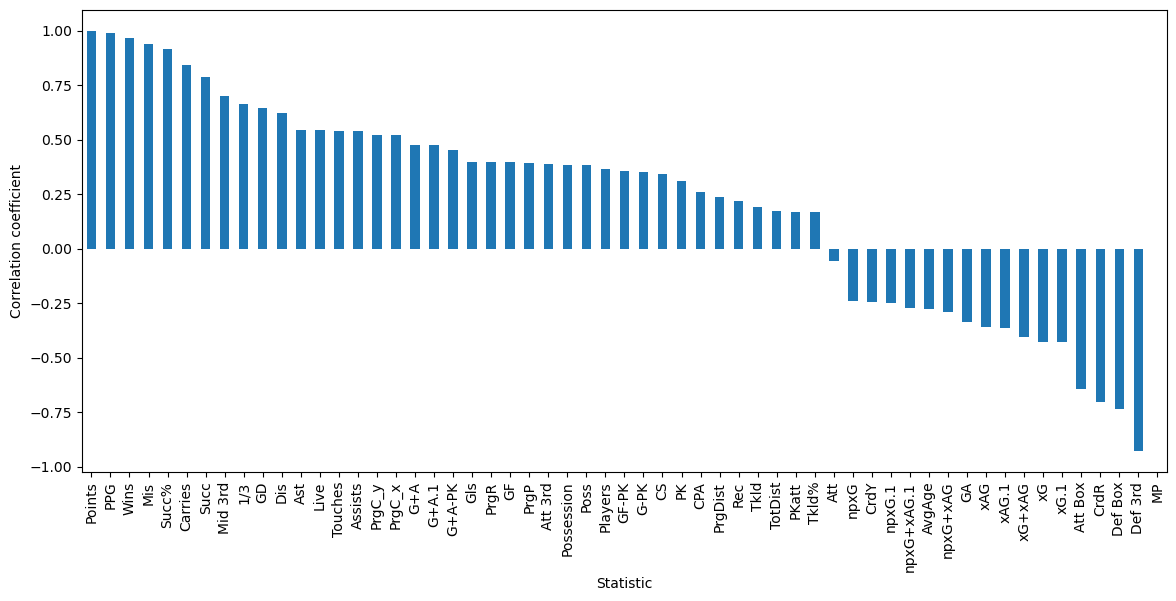

In [451]:
# Select all numeric columns
numeric_cols = merged_df.select_dtypes(include='number').columns

# Calculate correlation
corr_all = merged_df[numeric_cols].corr()

# Get correlations with Points
point_corr_all = corr_all['Points'].sort_values(ascending=False)

# Plot
plt.figure(figsize=(14,6))
point_corr_all.plot(kind='bar')
plt.ylabel('Correlation coefficient')
plt.xlabel('Statistic')
plt.xticks(rotation=90)
plt.show()

#### This visualisation shows the correlation coefficients between a wide range of statistical metrics and total points achieved in a season. It ranks the metrics by their strength of correlation, revealing which aspects of performance are most closely linked to success.

#### The results make it clear that wins, points per game, and attacking output (such as goals and G+A) have the strongest positive correlations with league points. In contrast, some defensive and peripheral metrics show weaker or even negative relationships. This suggests that attacking productivity plays a much bigger role in determining title-winning campaigns than many other statistical areas.

#### For Manchester City 2017/18, this is particularly significant. Their exceptional attacking output directly aligns with the metrics most predictive of league success, helping to explain why they were able to break records and secure the title with such dominance. This kind of analysis moves beyond description, providing a clear link between performance strategy and outcome.

# Champion Teams: Absolute Stats Comparison

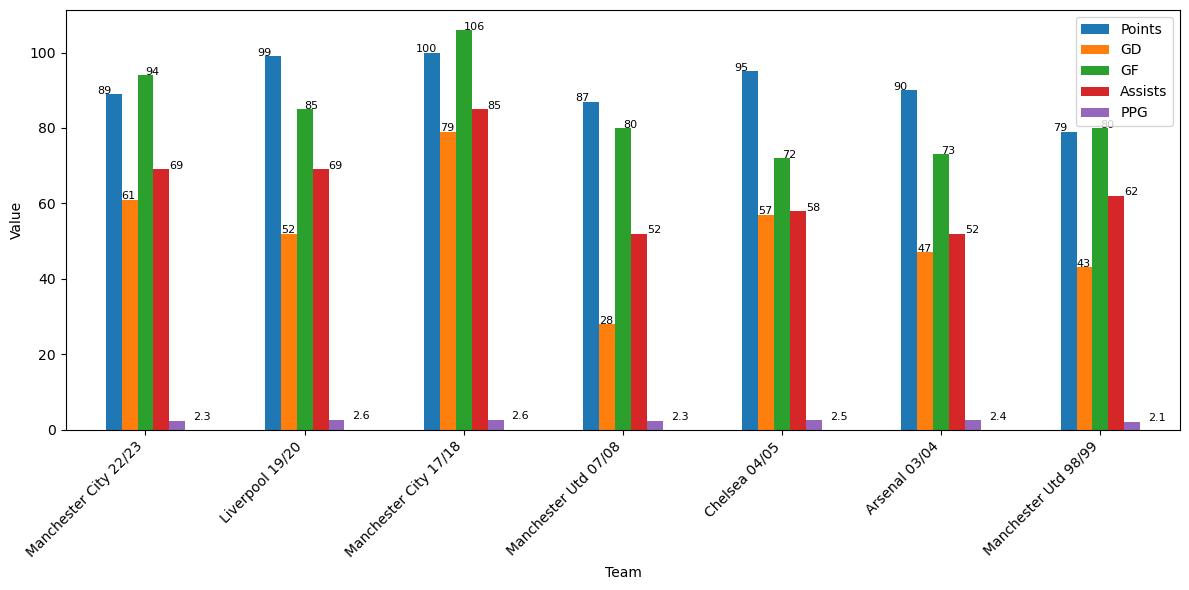

In [455]:
# Select stats to compare
stats_abs = ['Points', 'GD', 'GF', 'Assists', 'PPG']

champions = ['Manchester City 17/18', 'Liverpool 19/20', 'Manchester City 22/23', 'Manchester Utd 07/08', 'Arsenal 03/04', 'Manchester Utd 98/99', 'Chelsea 04/05']
data_champ = merged_df[merged_df['Team'].isin(champions)][['Team'] + stats_abs].set_index('Team')

# Plot bar chart
data_champ.plot(kind='bar', figsize=(12,6))
plt.ylabel('Value')
plt.xticks(rotation=45, ha='right')

# Add values on top of bars
for i, col in enumerate(data_champ.columns):
    for j, val in enumerate(data_champ[col]):
        plt.text(j + i*0.15 - 0.3, val + 0.1, round(val,2), fontsize=8)

plt.tight_layout()
plt.show()

#### A bar chart with bars for Points, GD, GF, Assists and PPG. The worst-performing team overall is Manchester United 07/08, and the best is Manchester City 17/18. In each metric shown, Manchester City 17/18 is first, scoring 1 more point than Liverpool 19/20, a goal difference of at least 18 more than anyone else, and 12 more goals than their treble counterpart. Along with 16 more assisted goals and a joint top PPG with Liverpool 19/20. The level of attacking prowess is far and away the best here, more goals created and scored leads to higher points, thus meaning higher points per game. 

# Attacking Contribution per 90 Minutes

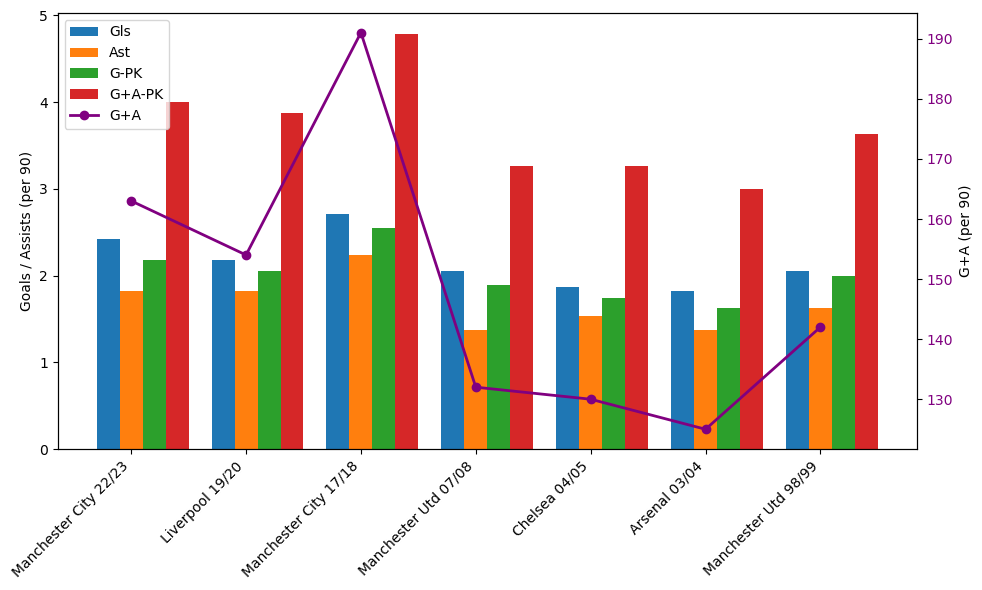

In [520]:
# Choose your columns
cols = ['Gls', 'Ast', 'G+A', 'G-PK', 'G+A-PK']

# Create the figure and primary axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the first set of bars (all except 'G+A')
x = range(len(merged_df))
width = 0.2

ax1.bar([p - width for p in x], merged_df['Gls'], width, label='Gls')
ax1.bar(x, merged_df['Ast'], width, label='Ast')
ax1.bar([p + width for p in x], merged_df['G-PK'], width, label='G-PK')
ax1.bar([p + 2*width for p in x], merged_df['G+A-PK'], width, label='G+A-PK')

ax1.set_ylabel('Goals / Assists (per 90)')
ax1.tick_params(axis='y')

# Create the secondary axis for 'G+A'
ax2 = ax1.twinx()
ax2.plot(x, merged_df['G+A'], color='purple', marker='o', linewidth=2, label='G+A')
ax2.set_ylabel('G+A (per 90)')
ax2.tick_params(axis='y', labelcolor='purple')

# X-axis labels
ax1.set_xticks(x)
ax1.set_xticklabels(merged_df['Team'], rotation=45, ha='right')

# Combine legends from both axes
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles1 + handles2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.show()

#### This visualisation compares the attacking output per 90 minutes for each title-winning team, focusing on goals, assists, and combined goal contributions. A secondary axis is used for total goals plus assists to make differences clearer without overwhelming the chart.

#### The chart highlights how Manchester City’s 2017/18 team produced a significantly higher volume of attacking output than any other team in the dataset. Their G+A per 90 is far ahead of the rest, indicating not only their prolific goal scoring but also their creative play and chance generation. Other teams, such as Liverpool 2019/20, display more balanced output, but none reach City’s peak levels.

#### This is important because goal contributions per 90 strongly reflect a team’s dominance in open play. The 2017/18 City side didn’t just win games, they consistently overwhelmed opponents with attacking volume, which directly translated into a record-breaking points tally.

# Season Dominance Comparison (Normalised)

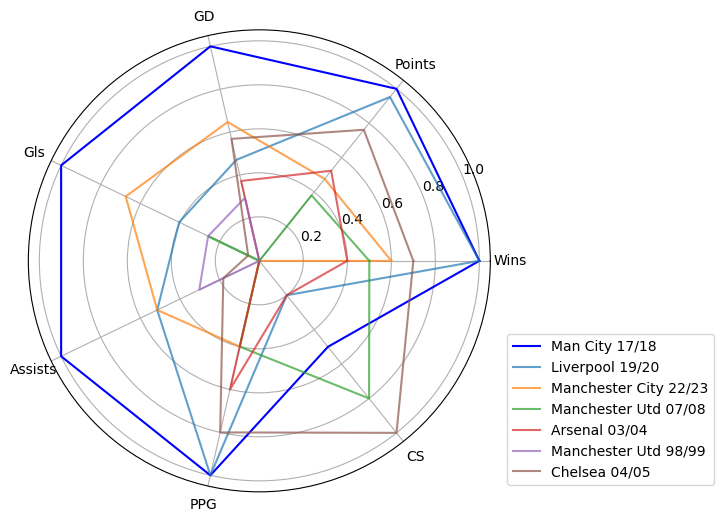

In [453]:
# Select stats to compare
stats = ['Wins', 'Points', 'GD', 'Gls', 'Assists', 'PPG', 'CS']
teams = merged_df['Team']

# Normalise data
data = merged_df[stats].fillna(0)  # Replace NaNs with 0
data_norm = (data - data.min()) / (data.max() - data.min())

# Radar chart setup
angles = np.linspace(0, 2*np.pi, len(stats), endpoint=False).tolist()
angles += angles[:1]  # complete the loop

# Plot for Man City 17/18
fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(polar=True))
team_row = data_norm[merged_df['Team'] == 'Manchester City 17/18'].iloc[0].tolist()
team_row += team_row[:1]  # close loop
ax.plot(angles, team_row, color='blue', linewidth=1.5, label='Man City 17/18')
ax.fill(angles, team_row, color='blue', alpha=0)

# Plot other champions
for team in ['Liverpool 19/20', 'Manchester City 22/23', 'Manchester Utd 07/08', 'Arsenal 03/04', 'Manchester Utd 98/99', 'Chelsea 04/05']:
    row = data_norm[merged_df['Team'] == team].iloc[0].tolist()
    row += row[:1]
    ax.plot(angles, row, linewidth=1.5, alpha=0.7, label=team)
    ax.fill(angles, team_row, alpha=0)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(stats)
ax.legend(loc='lower right', bbox_to_anchor=(1.5, 0))
plt.show()

#### The radar chart provides a holistic comparison of different champion teams across several key performance metrics, including points, wins, goals, assists, clean sheets, goal difference, and points per game. By normalising these values, the chart allows for a direct and fair comparison between sides from different seasons.

#### The shape of the radar plot makes City’s dominance clear. Their 2017/18 team reaches or nears the outer edge in almost every category, demonstrating exceptional consistency and quality across all aspects of performance. Other great teams, such as Chelsea 2004/05 and Liverpool 2019/20, show strength in specific areas, but none match City’s all-round superiority.

#### This matters because it shows that City’s success was not built on a single strength. It was the product of a complete, well-rounded team. They excelled in attack, maintained a strong defence, and sustained performance throughout the season, which is why their campaign is widely considered one of the most dominant in Premier League history.

# In-depth Comparison between Manchester City 17/18, Liverpool 19/20 and Manchester City 22/23

#### This section of the analysis is dedicated only to the 3 most recent title winners of the selected teams. The reason for this is that statistically, they are the only teams I can properly compare. Due to the limitations of advanced stats not being available before 2010, these are the only other teams that had a complete dataset of every stat I collected. All of the other historic teams had basic stats and could only form a general comparison with Man City 17/18. 

# Normalized Stats Comparison: City 17/18 vs Liverpool 19/20 vs City 22/23

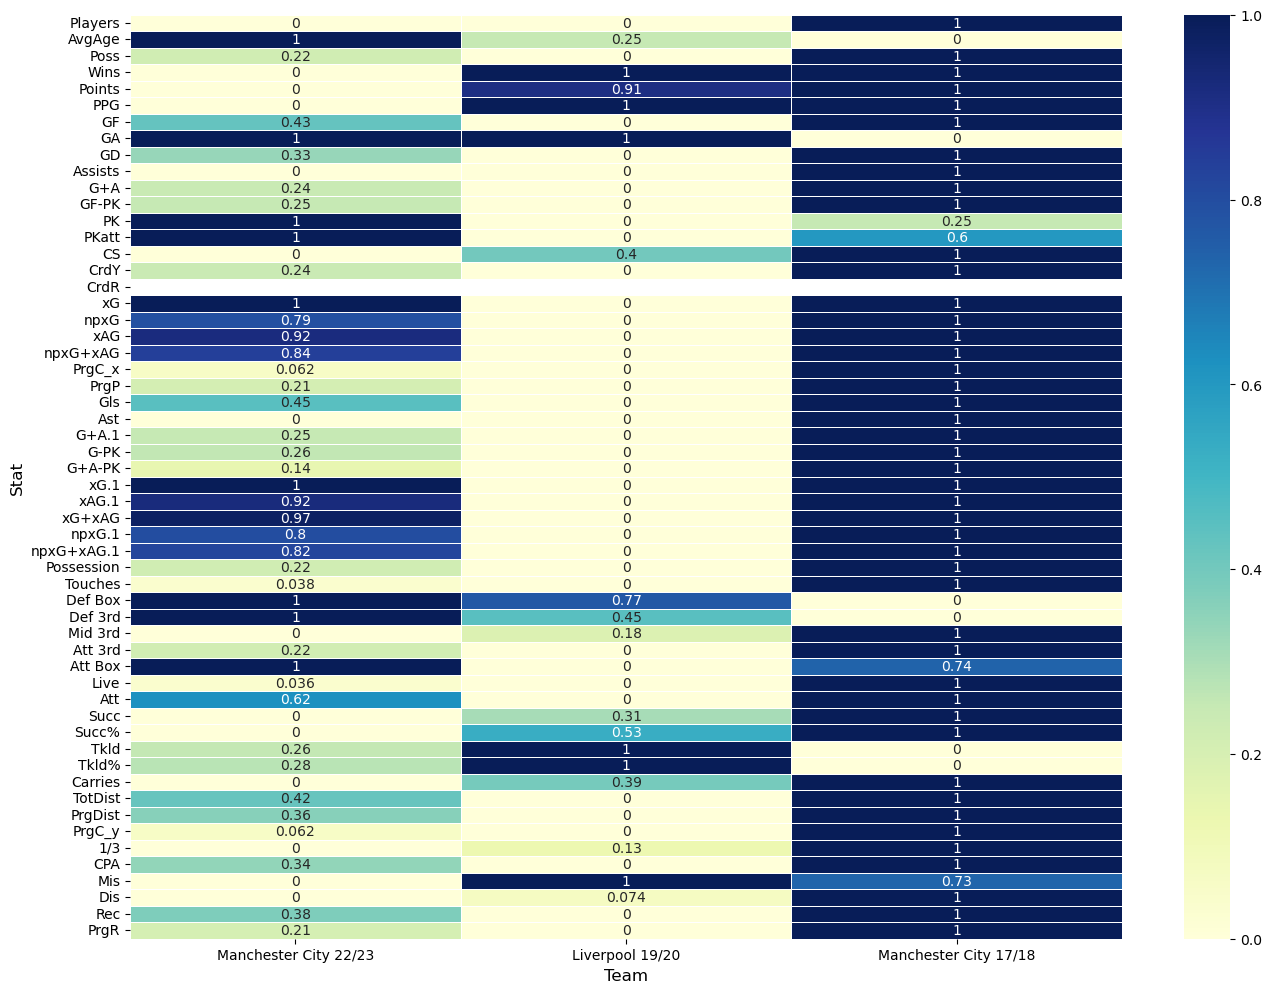

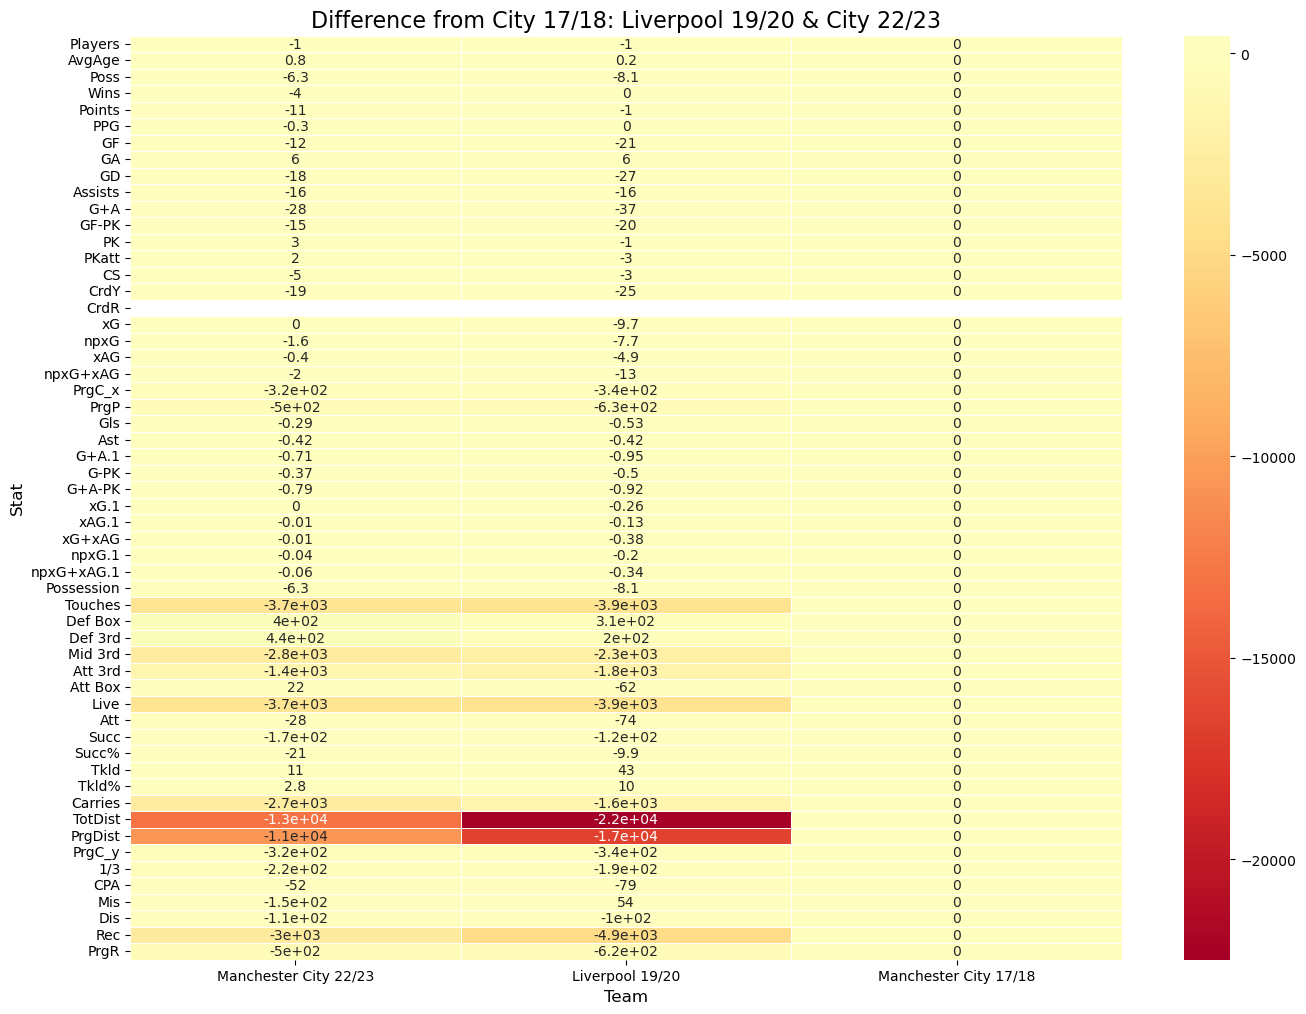

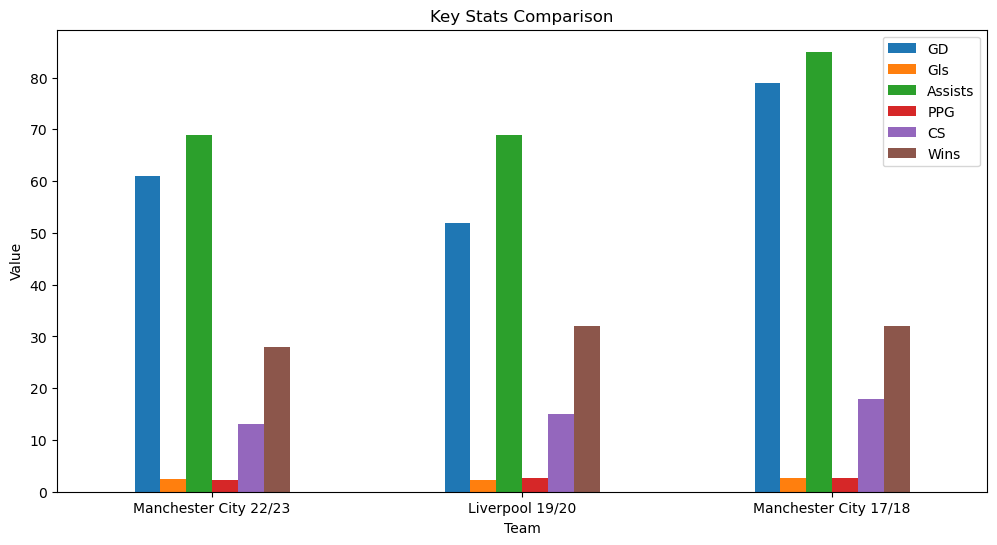

In [458]:
# Select the three teams
teams_to_compare = ['Manchester City 17/18', 'Liverpool 19/20', 'Manchester City 22/23']
df_3teams = merged_df[merged_df['Team'].isin(teams_to_compare)].set_index('Team')

# Select numeric stats
numeric_cols = df_3teams.select_dtypes(include='number').columns.tolist()
# Optionally remove less relevant columns
numeric_cols = [col for col in numeric_cols if col not in ['MP', '90s']]
df_stats = df_3teams[numeric_cols]

# Normalise stats for comparison
df_norm = (df_stats - df_stats.min()) / (df_stats.max() - df_stats.min())

# Heatmap 
plt.figure(figsize=(16,12))
sns.heatmap(df_norm.T, annot=True, cmap='YlGnBu', linewidths=0.5)
plt.xlabel('Team', fontsize=12)
plt.ylabel('Stat', fontsize=12)
plt.show()

# Difference from City 17/18
city_17_18 = df_stats.loc['Manchester City 17/18']
diff_df = df_stats.subtract(city_17_18, axis=1)

plt.figure(figsize=(16,12))
sns.heatmap(diff_df.T, annot=True, cmap='RdYlGn', center=0, linewidths=0.5)
plt.title('Difference from City 17/18: Liverpool 19/20 & City 22/23', fontsize=16)
plt.xlabel('Team', fontsize=12)
plt.ylabel('Stat', fontsize=12)
plt.show()


key_stats = ['Points_total', 'GD', 'Gls', 'Assists', 'PPG', 'CS', 'Wins'] 
key_stats = [stat for stat in key_stats if stat in df_stats.columns]

df_stats[key_stats].plot(kind='bar', figsize=(12,6))
plt.title('Key Stats Comparison')
plt.ylabel('Value')
plt.xlabel('Team')
plt.xticks(rotation=0)
plt.show()


### **Normalised Heatmap**

#### The first heatmap provides a normalised comparison across a wide range of performance metrics, including goals, assists, possession, expected goals (xG), progressive metrics, and defensive stats. The deeper blue tones under Manchester City 17/18 indicate consistently higher values across most attacking and possession-based statistics. Metrics such as goals (Gls), assists, goal difference (GD), possession, and xG categories are close to the maximum among the three teams. Liverpool 19/20 and City 22/23 also show strong values in many areas, but their normalisation values are often slightly lower, suggesting that 17/18 was more balanced and complete statistically.

### **Difference from Manchester City 17/18**

#### The second heatmap subtracts City 17/18’s stats from the other two teams, highlighting where they fell short. A large number of negative differences (orange and red shades) for Liverpool 19/20 and City 22/23 reflect how City 17/18 set the benchmark. Notably, metrics such as goals scored, goal difference, total distance covered, progressive carries, and attacking third stats show clear gaps in favour of City 17/18. This visualisation demonstrates that even other title-winning sides were statistically behind in key areas.

### **Key Stats Bar Chart**

#### The bar chart focuses on headline metrics: Points, Goal Difference, Goals, Assists, Points Per Game, Clean Sheets, and Wins. City 17/18 leads clearly in GD and Goals, highlighting their relentless attack. They also edge out the other two teams in points per game, reflecting consistent performance across the season. While Liverpool 19/20 and City 22/23 were outstanding campaigns in their own right, City 17/18 delivered a more dominant combination of attacking firepower and defensive solidity.

# Normalised Possession & Progression Profile

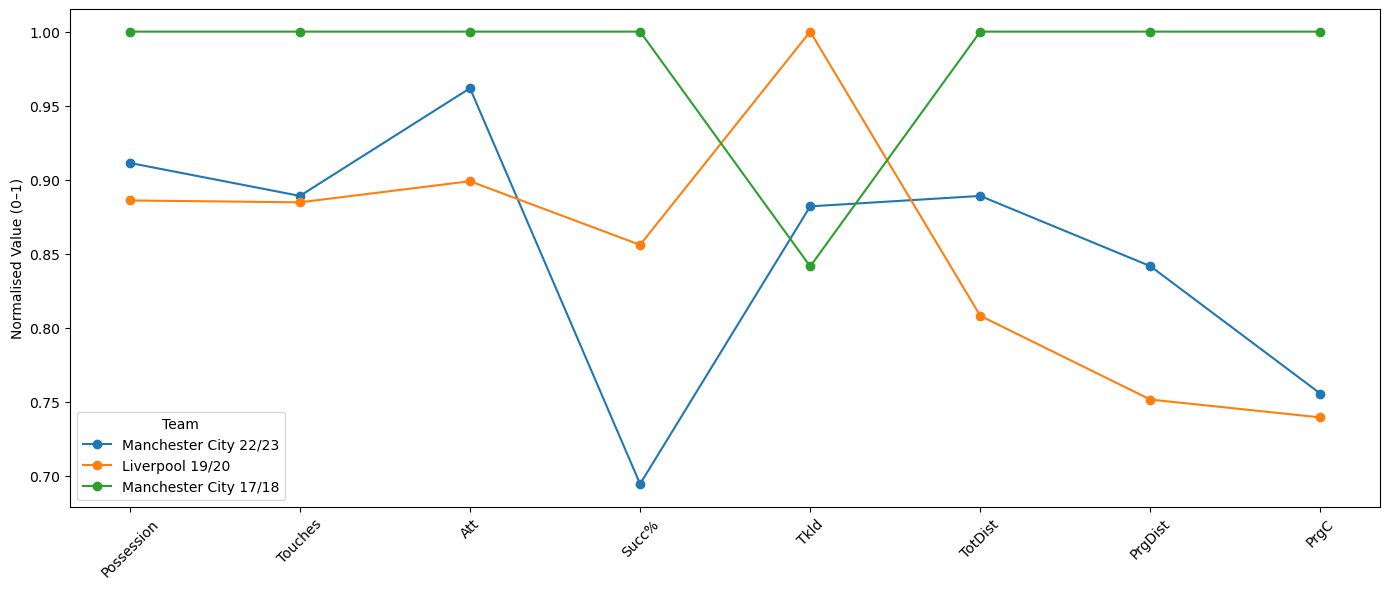

In [462]:
# Normalise stats to compare fairly
df_norm = df_vis.set_index('Team') / df_vis.set_index('Team').max()

# Plot
plt.figure(figsize=(14,6))
for team in df_norm.index:
    plt.plot(df_norm.columns, df_norm.loc[team], marker='o', label=team)

plt.ylabel('Normalised Value (0–1)')
plt.xticks(rotation=45)
plt.legend(title='Team')
plt.tight_layout()
plt.show()


#### As you can see, this profile displays the sheer dominance and superiority that the 'Centurions' possessed when it came to possession and with the ball, the most important characteristic of a Pep Guardiola side. Compared to the other two, they comfortably sit at the top of nearly every aspect, only falling short in Tkld (Times Tackled during a Take-On). This iteration of Pep's City side was the ultimate possession machine, and having nearly all the stats normalised at 1 shows how paramount keeping the ball was to the success of this team. By keeping the ball, you give your opponent fewer opportunities to create chances and score goals, reducing the threat of losing matches. 

# Possession vs Expected Goals

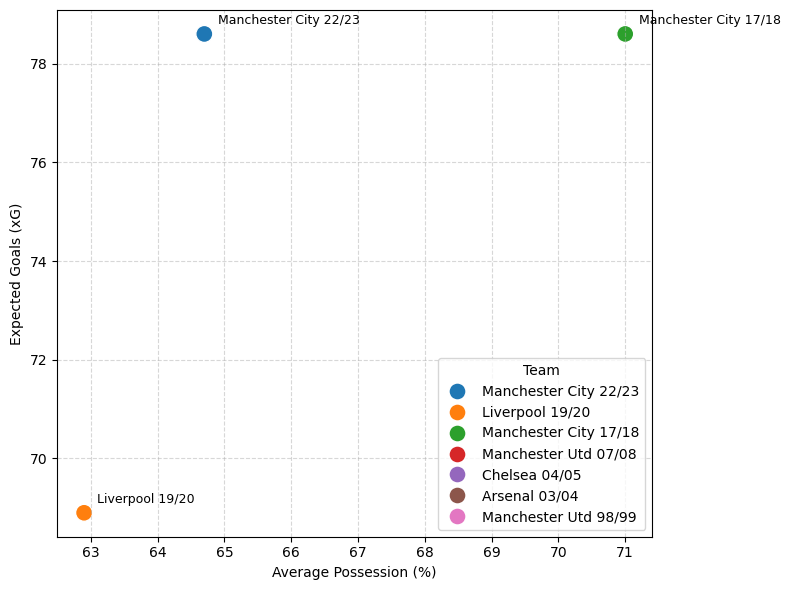

In [468]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=merged_df, x='Possession', y='xG', hue='Team', s=150)

for i, row in merged_df.iterrows():
    plt.text(row['Possession']+0.2, row['xG']+0.2, row['Team'], fontsize=9)

plt.xlabel('Average Possession (%)')
plt.ylabel('Expected Goals (xG)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### Average Possession against Expected Goals. Comparing how each team's possession links to their expected goals. However, there is not really much relation, as both Manchester City teams have the same expected goals, but have a 6.3 percentage point difference in average possession. This means that possession by itself does not tell the full story. It's more about what teams do with the possession, quality and amount of chance creation that relates to their expected goals.

# Expected Goals vs Actual Goals

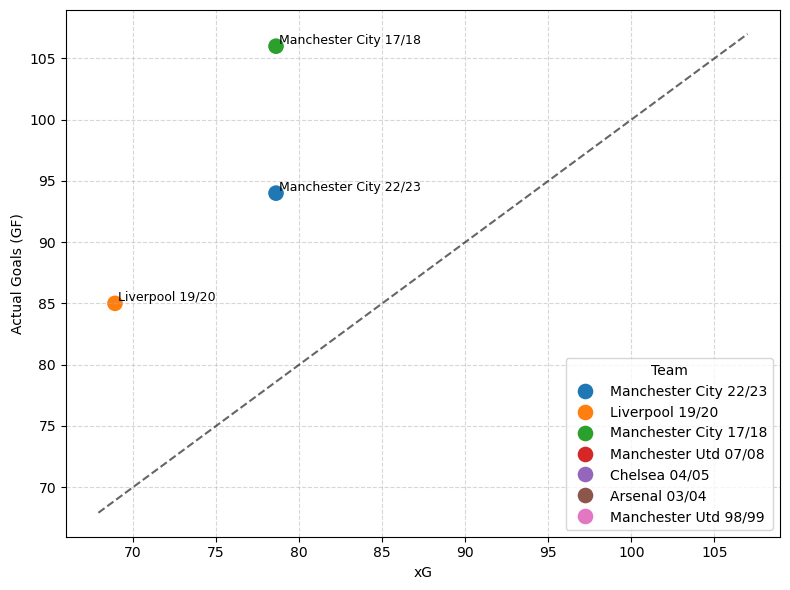

In [471]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=merged_df, x='xG', y='GF', hue='Team', s=150)

for i, row in merged_df.iterrows():
    plt.text(row['xG']+0.2, row['GF']+0.2, row['Team'], fontsize=9)

# Reference line (1:1 line)
lims = [min(merged_df['xG'].min(), merged_df['GF'].min()) - 1, 
        max(merged_df['xG'].max(), merged_df['GF'].max()) + 1]
plt.plot(lims, lims, 'k--', alpha=0.6)

plt.xlabel('xG')
plt.ylabel('Actual Goals (GF)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


#### This graph aims to place these champions in a comparison not only against themselves, but their own expected goals. The scatter plot above tells us how much a team has underperformed or overperformed in terms of their expected goals for that season, in comparison to how many they actually scored. The line of best fit shows an equal performance between expected and actual goals, so, for example, 80 xG on the dotted line points to 80 GF. For all of these champions, they exceeded their xG stat as they are all above the line. However, while Manchester City 22/23 and Liverpool 19/20 are close in proximity, with a difference of GF of 9, Manchester City 17/18 are in a league of their own when it comes to overperformance. With an identical expected goals for the season to their treble counterparts, the difference in actual goals scored is 12, and a gap of 21 to Liverpool's actual goals. What this tells us is that Man City 17/18 scored 24.7% more goals than Liverpool 19/20, and overperformed their own xG by 32.9%, almost a third more goals scored. This level of clinicality is head and shoulders above the competition, asserting control in the goalscoring department. 

# Advanced Metrics Comparison: City 17/18 vs Recent Champions

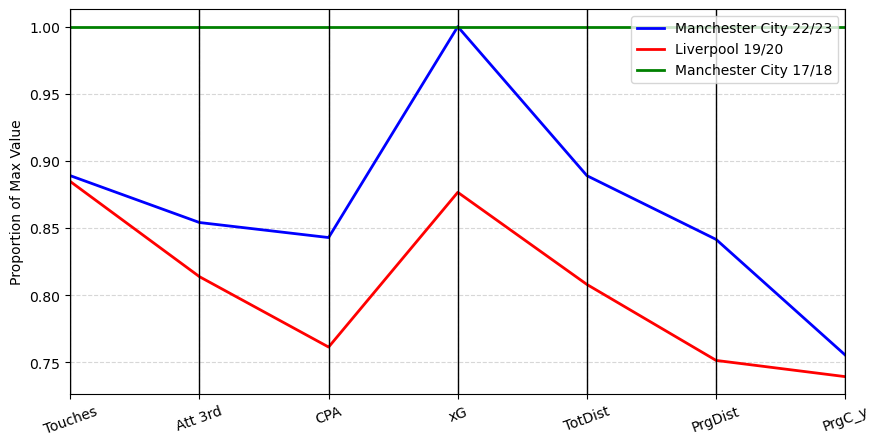

In [474]:
# Select only the 3 teams
df_top3 = merged_df[merged_df['Team'].isin(['Manchester City 17/18','Liverpool 19/20','Manchester City 22/23'])]

# Stats to plot
metrics = ['Touches', 'Att 3rd', 'CPA', 'xG', 'TotDist', 'PrgDist', 'PrgC_y']
df_plot = df_top3[['Team'] + metrics]

# Normalise for visual comparison
df_norm = df_plot.copy()
df_norm[metrics] = df_norm[metrics] / df_norm[metrics].max()

plt.figure(figsize=(10,5))
parallel_coordinates(df_norm, 'Team', color=['blue','red','green'], linewidth=2)
plt.ylabel('Proportion of Max Value')
plt.xticks(rotation=20)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

#### Here I have compiled and visualised some advanced stats that are essential to portraying a team's dominance. Manchester City 17/18 wipe the floor again with the other modern champions in each metric, a consistent, strong line right across the 1 point. This tells us that this juggernaut of a team was constantly moving the ball forward and spent a long time in the attacking third with touches, thus meaning a lot of expected goals. The only comparison that can be made from this is that expected goals were identical in both the treble-winning City team and the 100 points side. 

# Conclusion

#### Based on the statistical evidence presented through multiple visualisations, it’s clear why many consider Manchester City’s 2017/18 campaign the most dominant in Premier League history. The heatmap comparisons highlight how City consistently outperformed both Liverpool F.C. 2019/20 and Manchester City 2022/23 across key metrics. Their goal difference, total points, win tally, and attacking output set a new standard for excellence in the league. In particular, their record-breaking 100-point season, only two losses, and overwhelming attacking numbers demonstrate a level of control that very few teams have ever reached.

#### The second heatmap showing the differences from the 2017/18 benchmark underlines this even more. Both Liverpool 19/20 and City 22/23, despite being incredible sides in their own right, fell short in multiple key categories such as goals scored, goal difference, and progressive attacking actions. City 17/18’s ability to dominate matches both statistically and visually through possession, pressing, and sheer attacking volume, which made them a unique outlier in the Premier League era.

#### However, this dominance should also be understood in context. Later teams like Liverpool 19/20 and City 22/23 faced different challenges, such as stronger league competition, fixture congestion, and evolving tactical landscapes. Liverpool, for instance, displayed exceptional defensive solidity and game control, while City 22/23 combined efficiency with European success. Furthermore, metrics like expected goals and progression stats have evolved over time, making direct comparisons more complex.

#### Ultimately, City 17/18’s season remains the statistical benchmark for domestic dominance. This is a team that not only won the league but redefined what dominance looks like. Yet, when factoring in competitiveness, tactical evolution, and achievements beyond just the numbers, the debate remains open. This nuanced view helps explain why City 17/18 are widely celebrated, but not unanimously declared the single greatest Premier League champion.